## **Tugas 5, Komputasi Nuklir**
**Dhiya Salma Salsabila/24923304**

## Soal
1. Membuat program transfer panas 1 dimensi dengan metode finite difference secara eksplisit, implisit dan Crank-Nicholson

## Jawab
## <center>**Hukum Fourier**</center> 
<br> Dalam hukum fourier menyatakan bahwa tingkat perpindahan panas melalui sebuah material berbanding lurus dengan gradien pada suhu dan luas.
<br> Bentuk diferensial hukum fourier:
$$ \vec{q} = -k \nabla T $$
Dimana:
- $ \vec{q} $ : densitas aliran panas
- k : konduktivitas termal
- $\nabla$ T : gradien suhu

<br> Dengan menggunakan prinsip kekekalan energi:
$$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T $$
<br> Operator laplace untuk koordinat 1 dimensi kartesian:
$$ \nabla^2 T = \frac{\partial^2 T}{\partial x^2}$$
<br> Maka persamaan menjadi:
$$ \frac{\partial T(x,t)}{\partial t} = \alpha [\frac{\partial^2 T(x,t)}{\partial x^2}]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Initial values
L = 1.0           # Panjang batang 1D
WaktuMax = 1.0    # Waktu maksimal
alpha = 0.5      # Difusivitas termal
Nx = 100          # Jumlah diskritisasi ruang
Nt = 100          # Jumlah diskritisasi waktu
dx = L / Nx       # Delta x
dt = WaktuMax / Nt # Delta t

Tmin = 0
Tmax = 300
x = np.linspace(0, L, Nx)
t = np.linspace(0, WaktuMax, Nt)

## Metode Eksplisit
Digunakan penyelesaian dengan numerik menggunakan metode forward difference dan central difference, dimana:
- Forward Difference
$$ \frac{\partial T(x,t)}{\partial t} = \frac{T(x,t+\Delta t)-T(x,t)}{ \Delta t}$$
- Central Difference
$$ \frac{\partial^2 T(x,t)}{\partial x^2} = \frac{T(x+\Delta x,t)-2T(x,t)+T(x-\Delta x,t)}{\Delta x^2}$$
Maka persamaan menjadi:
$$ \frac{T(x,t+\Delta t)-T(x,t)}{ \Delta t} = \alpha \frac{T(x+\Delta x,t)-2T(x,t)+T(x-\Delta x,t)}{\Delta x^2}  $$

CLF:
$$ \frac{\alpha \Delta t}{\Delta x^2} \leq \frac{1}{2} $$

In [2]:
# Metode eksplisit
def eksplisit(Nt, Nx, alpha, dx):
    # dt = dx**2/alpha # Delta t dengan CLF
    # Keadaan awal
    T = np.zeros((Nx, Nt))
    T[0, :] = Tmax*np.sin(np.pi * x)
    #print(T)
    for i in range(0, Nt - 1):
        for j in range(1, Nx - 1):
            T[i+1, j] = T[i, j] + (alpha * dt / dx**2) * (T[i, j+1] - 2 * T[i, j] + T[i, j-1])
            # Syarat batas
            T[i+1, 0] = 0 # Batas kiri
            T[i+1, -1] = 0 # Batas kanan
    return T

Teksplisit = eksplisit(Nt, Nx, alpha, dx)

## Metode Implisit
Digunakan penyelesaian dengan numerik menggunakan metode forward difference dan central difference, dimana:
- Forward Difference
$$ \frac{\partial T(x,t)}{\partial t} = \frac{T(x,t+\Delta t)-T(x,t)}{ \Delta t}$$
- Central Difference
$$ \frac{\partial^2 T(x,t)}{\partial x^2} = \frac{T(x+\Delta x,t+\Delta t)-2T(x,t+\Delta t)+T(x-\Delta x,t+\Delta t)}{\Delta x^2}$$


Maka persamaan menjadi:
$$ \frac{T(x,t+\Delta t)-T(x,t)}{ \Delta t} = \alpha \frac{T(x+\Delta x,t+\Delta t)-2T(x,t+\Delta t)+T(x-\Delta x,t+\Delta t)}{\Delta x^2}  $$
$$ T(x,t+\Delta t)-T(x,t) = \frac{\alpha \Delta t}{\Delta x^2} [T(x+\Delta x,t+\Delta t)-2T(x,t+\Delta t)+T(x-\Delta x,t+\Delta t)] $$
$$ T(x,t+\Delta t)-T(x,t) = \frac{\alpha \Delta t}{\Delta x^2} T(x+\Delta x,t+\Delta t)- \frac{\alpha \Delta t}{\Delta x^2} 2T(x,t+\Delta t)+ \frac{\alpha \Delta t}{\Delta x^2} T(x-\Delta x,t+\Delta t) $$
$$ -T(x,t) = \frac{\alpha \Delta t}{\Delta x^2} T(x+\Delta x,t+\Delta t)- \frac{\alpha \Delta t}{\Delta x^2} 2T(x,t+\Delta t) - T(x,t+\Delta t) + \frac{\alpha \Delta t}{\Delta x^2} T(x-\Delta x,t+\Delta t) $$
$$ T(x,t) = -\frac{\alpha \Delta t}{\Delta x^2} T(x+\Delta x,t+\Delta t) +\frac{\alpha \Delta t}{\Delta x^2} 2T(x,t+\Delta t) + T(x,t+\Delta t) - \frac{\alpha \Delta t}{\Delta x^2} T(x-\Delta x,t+\Delta t) $$

Misalkan:
$$ r = \frac{\alpha \Delta t}{\Delta x^2}$$
Persamaan menjadi:
$$ T(x,t) = -r T(x+\Delta x,t+\Delta t) +(2r+1) T(x,t+\Delta t) - r T(x-\Delta x,t+\Delta t) $$

Bentuk persamaan tersebut dapat di tuliskan ke dalam matriks menjadi:
$$
T(x,t) = 
\begin{pmatrix}
  -r      & 2r+1 & -r   & 0  &0    &0\\
  0       & -r   & 2r+1 & -r &0   &0 \\
  0       & 0    & -r   &\ddots  & \vdots  & \vdots \\
  0       & 0    & 0   & \cdots  & 2r+1 & -r  \\
\end{pmatrix}
\begin{pmatrix}
  T(x-\Delta x)^{t+\Delta t}\\
  \vdots \\
  T(x)^{t+\Delta t} \\
  \vdots \\
  T(x+\Delta x)^{t+\Delta t}\\
\end{pmatrix}
$$
$$ T^t = A T^{t+\Delta t} $$

In [3]:
# Metode Implisit
def implisit(alpha, dt, dx):
    # Keadaan awal
    T = np.zeros((Nx, Nt))
    T[0, :] = Tmax*np.sin(np.pi * x)
    #print(T)
    r = alpha*dt / dx**2
    # Matriks A
    A = np.zeros((Nx-2, Nx-2))
    for i in range(Nx-2):
        if i !=0:
            A[i,i-1] = -r
        A[i,i] = 2*r+1
        if i != Nx-3:
            A[i,i+1] = -r
    for i in range(0, Nt-1):
        B = T[i,1:-1]
        T[i+1,1:-1]= np.linalg.solve(A,B)
    return T

Timplisit = implisit(alpha, dt, dx)

## Metode Crank-Nicholson
Digunakan penyelesaian dengan numerik menggunakan metode forward difference dan central difference, dimana:
- Forward Difference
$$ \frac{\partial T(x,t)}{\partial t} = \frac{T(x,t+\Delta t)-T(x,t)}{ \Delta t}$$
- Central Difference
$$ \frac{\partial^2 T(x,t)}{\partial x^2} = \frac{1}{2} [\frac{T(x+\Delta x,t)-2T(x,t)+T(x-\Delta x,t)}{\Delta x^2} + \frac{T(x+\Delta x,t+\Delta t)-2T(x,t+\Delta t)+T(x-\Delta x,t+\Delta t)}{\Delta x^2}]$$

Maka persamaan menjadi:
$$ \frac{T(x,t+\Delta t)-T(x,t)}{ \Delta t} = \frac{\alpha}{2} [\frac{T(x+\Delta x,t)-2T(x,t)+T(x-\Delta x,t)}{\Delta x^2} + \frac{T(x+\Delta x,t+\Delta t)-2T(x,t+\Delta t)+T(x-\Delta x,t+\Delta t)}{\Delta x^2}] $$
$$ T(x,t+\Delta t)-T(x,t) = \frac{\alpha \Delta t}{ 2 \Delta x^2} [T(x+\Delta x,t)-2T(x,t)+T(x-\Delta x,t) + T(x+\Delta x,t+\Delta t)-2T(x,t+\Delta t)+T(x-\Delta x,t+\Delta t)] $$

Misalkan:
$$ r = \frac{\alpha \Delta t}{ 2 \Delta x^2}$$
Persamaan menjadi:
$$ T(x,t+\Delta t)-T(x,t) = r T(x+\Delta x,t)-r 2T(x,t)+r T(x-\Delta x,t) + r T(x+\Delta x,t+\Delta t)-r 2T(x,t+\Delta t)+ rT(x-\Delta x,t+\Delta t) $$
$$ T(x,t+\Delta t)- r T(x+\Delta x,t+\Delta t)+r 2T(x,t+\Delta t) - rT(x-\Delta x,t+\Delta t) = r T(x+\Delta x,t)-r 2T(x,t)+r T(x-\Delta x,t) + T(x,t)  $$
$$ - r T(x+\Delta x,t+\Delta t)+ (2r+1) T(x,t+\Delta t) - rT(x-\Delta x,t+\Delta t) = r T(x+\Delta x,t)+ (-2r+1) T(x,t)+r T(x-\Delta x,t)  $$

Bentuk persamaan tersebut dapat di tuliskan ke dalam matriks menjadi:
$$
\begin{pmatrix}
  -r      & 2r+1 & -r   & 0  &0    &0\\
  0       & -r   & 2r+1 & -r &0   &0 \\
  0       & 0    & -r   &\ddots  & \vdots  & \vdots \\
  0       & 0    & 0   & \cdots  & 2r+1 & -r  \\
\end{pmatrix}
\begin{pmatrix}
  T(x-\Delta x)^{t+\Delta t}\\
  \vdots \\
  T(x)^{t+\Delta t} \\
  \vdots \\
  T(x+\Delta x)^{t+\Delta t}\\
\end{pmatrix}
=
\begin{pmatrix}
  r      & -2r+1 & r   & 0  &0    &0\\
  0       & r   & -2r+1 & r &0   &0 \\
  0       & 0    & r   &\ddots  & \vdots  & \vdots \\
  0       & 0    & 0   & \cdots  & -2r+1 & r  \\
\end{pmatrix}
\begin{pmatrix}
  T(x-\Delta x)^{t}\\
  \vdots \\
  T(x)^{t} \\
  \vdots \\
  T(x+\Delta x)^{t}\\
\end{pmatrix}
$$
$$ A T^{t+\Delta t} = B T^t $$
$$ T^{t+\Delta t} = A^{-1} B T^t  $$

In [31]:
# Metode Crank-Nicholson
def crank_nicholson(alpha, dt, dx):
    # Keadaan awal
    T = np.zeros((Nx, Nt))
    T[0, :] = Tmax*np.sin(np.pi * x)
    #print (T)
    r = alpha*dt / (2*dx**2)
    # Matriks A dan B
    A = np.zeros((Nx-2, Nx-2))
    B = np.zeros((Nx-2, Nx-2))
    for i in range(Nx-2):
        if i !=0:
            A[i,i-1] = -r
            B[i,i-1] = r
        A[i,i] = 2*r+1
        B[i,i] = -2*r+1
        if i != Nx-3:
            A[i,i+1] = -r
            B[i,i+1] = r
    # Inverse matriks A
    # print(A)
    A = np.linalg.pinv(A)
    C = np.matmul(A,B)
    # Hitung nilai T
    #print(C)
    for i in range(0, Nt-1):
        D = T[i,1:-1]
        T[i+1,1:-1]= np.linalg.solve(C,D)
    return T

Tcrank_nicholson = crank_nicholson(alpha, dt, dx)
#print(Tcrank_nicholson)

## Membuat Grafik

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


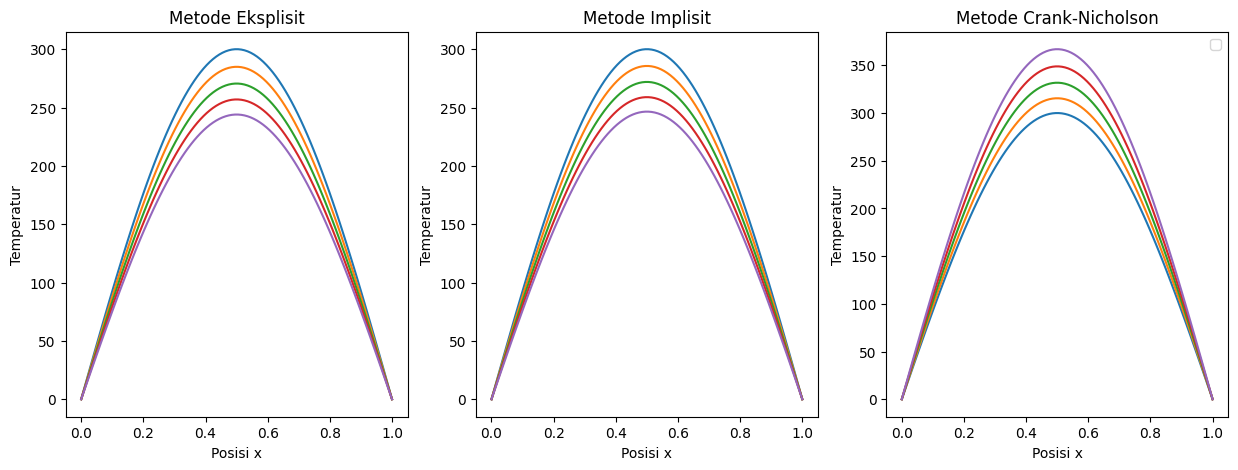

In [ ]:
# Plot grafik
# Eksplisit
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
for i in range(0, Nt//20):
    plt.plot(x, Teksplisit[i, :])
plt.title("Metode Eksplisit")
plt.xlabel("Posisi x")
plt.ylabel("Temperatur")

# Implisit
plt.subplot(1,3,2)
for i in range(0, Nt//20):
    plt.plot(x, Timplisit[i,:])
plt.title("Metode Implisit")
plt.xlabel("Posisi x")
plt.ylabel("Temperatur")

# Crank-Nicholson
plt.subplot(1,3,3)
for i in range(0, Nt//20):
    plt.plot(x, Tcrank_nicholson[i,:])
plt.title("Metode Crank-Nicholson")
plt.xlabel("Posisi x")
plt.ylabel("Temperatur")
plt.legend()
plt.show()